#Proyek Analisis Data: Bike Sharing Dataset

Nama: dora Leonny Giselle

Email: gisedoraleonny@gmail.com

ID Dicoding: dora leonny giselle

#Menentukan pertanyaan bisnis

* Bagaimana perkembangan jumlah penyewaan sepeda dari tahun ke tahun?

* Sejauh mana faktor cuaca berpengaruh terhadap tingkat penggunaan sepeda oleh pengguna?

* Apa perbedaan pola penggunaan sepeda pada hari kerja, hari libur, dan hari biasa?

* Apakah terdapat hubungan antara suhu udara dan tingkat penyewaan sepeda yang tinggi?

#Import semua library yang diperlukan

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from datetime import datetime

#Data wrangling

Gathering data

In [ ]:
from google.colab import drive
import pandas as pd

# Menghubungkan Google Drive
drive.mount('/content/drive')

# Mengunduh dataset
day_data = pd.read_csv('/content/drive/MyDrive/Notebook/day_dataset.csv')
hour_data = pd.read_csv('/content/drive/MyDrive/Notebook/hour_dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load "day" table from Google Drive
day_df = pd.read_csv('/content/drive/My Drive/Notebook/day_dataset.csv')  # Ganti dengan path yang sesuai
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Load "hour" table

hour_df = pd.read_csv('/content/drive/My Drive/Notebook/hour_dataset.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#Assessing Data

Menilai day_df

In [ ]:
# Check the data types of day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
#Check for duplicated data in day_df.
print("Jumlah duplikasi: ", day_df.duplicated().sum())


Jumlah duplikasi:  0


tidak ada duplikasi , karna jumlah duplikasi = 0

In [ ]:
# Summary Statistical Parameters.

day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


tidak ada masalah dalam parameter statistic

In [ ]:
# Check the data types of hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Check for missing values in hour_df
hour_df.isna().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
#Displaying Summary Statistical Parameters.

hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#Cleaning Data

menghapus tabel yang tidak diperlukan

In [ ]:
del hour_df

menghapus kolomn yang tidak diperlukan

In [ ]:
#1. Menghapus kolom yang tidak diperlukan
# Misalnya, kita ingin menghapus kolom 'instant' karena tidak memberikan informasi yang berguna
# Check if 'instant' column exists before dropping
if 'instant' in day_df.columns:
    day_df.drop(columns=['instant'], inplace=True)
else:
    print("Column 'instant' not found in DataFrame.")

day_df.head()


Column 'instant' not found in DataFrame.


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Modifikasi kolom

In [ ]:
# 2. Memodifikasi kolom
# Mengubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


menampilakn infromasi setelah pembersihan

In [ ]:
# 5. Menampilkan informasi setelah pembersihan
print("\nInformasi Setelah Pembersihan Dataset:")
print(day_df.info())


Informasi Setelah Pembersihan Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), 

Save data yang telah dicleaning

In [ ]:
day_df.to_csv("cleaned_bikeshare.csv", index=False)

#Exploratory Data Analysis (EDA)


Explore data day_df

Analisis Statistik Penyewaan Sepeda Berdasarkan Bulan

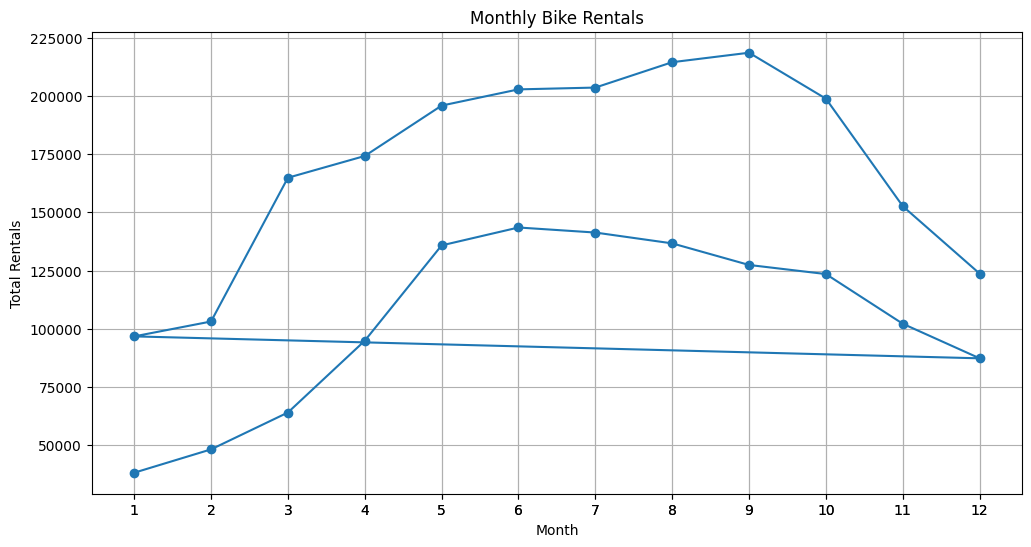

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correct dataset for total rentals (day_dataset.csv)
day_df = pd.read_csv('/content/drive/My Drive/Notebook/day_dataset.csv')  # Adjust the path as necessary
#day_df = pd.read_csv('/content/drive/My Drive/Notebook/hour_dataset.csv')  # Commenting out this line to prevent overwriting

# Convert 'dteday' to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Extract month and year for analysis
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

# Group by month and year to get monthly rental statistics
monthly_rentals = day_df.groupby(['year', 'month'])['cnt'].sum().reset_index() # changed 'total_rentals' to 'cnt'

# Plotting monthly rentals
plt.figure(figsize=(12, 6))
plt.plot(monthly_rentals['month'], monthly_rentals['cnt'], marker='o') # changed 'total_rentals' to 'cnt'
plt.title('Monthly Bike Rentals')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.xticks(monthly_rentals['month'])
plt.grid()
plt.show()

Insights from Monthly Rental Statistics

1.Tren Musiman: Identifikasi bulan-bulan puncak untuk penyewaan sepeda (misalnya, bulan-bulan musim panas mungkin menunjukkan penyewaan yang lebih tinggi).

2.Perbandingan Tahunan: Analisis bagaimana penyewaan telah berubah dari tahun ke tahun.


2. Weather Impact Analysis

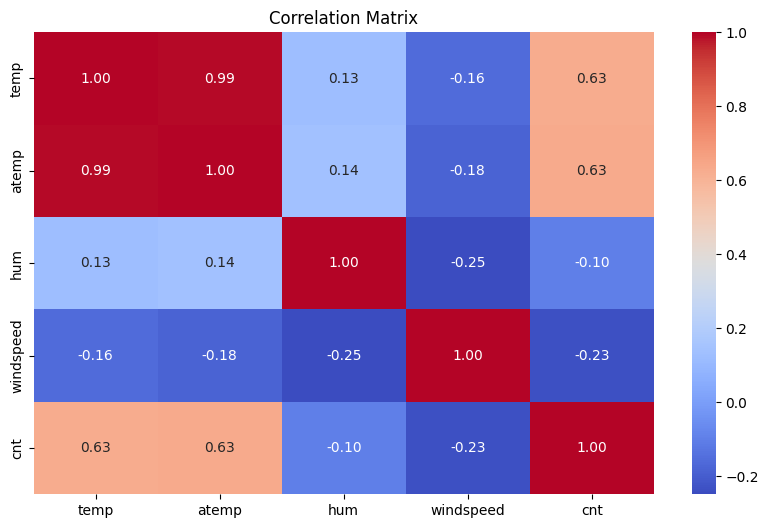

In [ ]:
# Correlation between weather features and total rentals
weather_columns = ['temp', 'atemp', 'hum', 'windspeed']  # Change 'humidity' to 'hum'
correlation = day_df[weather_columns + ['cnt']].corr()  # Change 'total_rentals' to 'cnt'


# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
plt.title('Correlation Matrix')
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Insights from Weather Impact Analysis

Suhu dan Penyewaan: Suhu yang lebih tinggi dapat berkorelasi dengan peningkatan penyewaan.

Kelembaban dan Penyewaan: Menganalisis bagaimana tingkat kelembapan memengaruhi penyewaan sepeda.

3. Holiday Rental Statistics

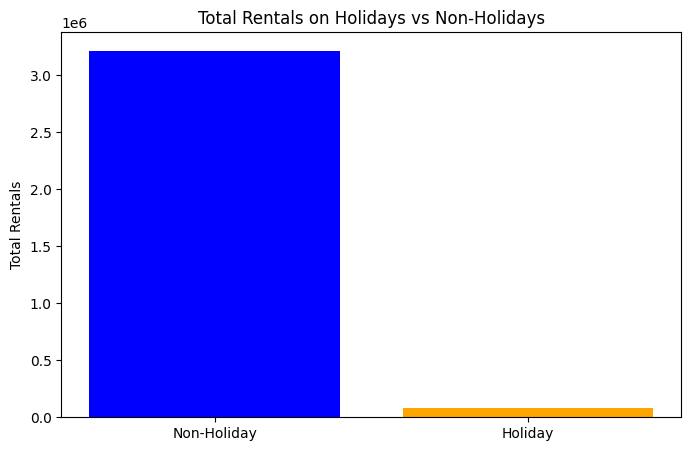

In [ ]:
# Group by holiday status
holiday_rentals = day_df.groupby('holiday')['cnt'].sum().reset_index()  # Changed 'total_rentals' to 'cnt'

# Plotting holiday vs non-holiday rentals
plt.figure(figsize=(8, 5))
plt.bar(holiday_rentals['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'}), holiday_rentals['cnt'], color=['blue', 'orange']) # Changed 'total_rentals' to 'cnt'
plt.title('Total Rentals on Holidays vs Non-Holidays')
plt.ylabel('Total Rentals')
plt.show()

jumlah rental sepeda pada hari kerja lebih tinggi dibadingkan dengan hari libur

4. Weekday vs Weekend Rental Comparison

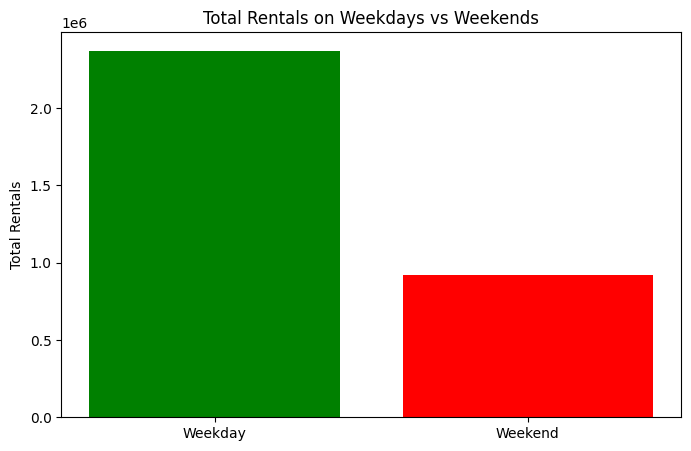

In [ ]:
# Create a new column for weekday/weekend
day_df['day_of_week'] = day_df['dteday'].dt.dayofweek
day_df['is_weekend'] = day_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Group by weekend status
# Changed 'total_rentals' to 'cnt' to match the actual column name in the dataset
weekend_rentals = day_df.groupby('is_weekend')['cnt'].sum().reset_index()

# Plotting weekday vs weekend rentals
plt.figure(figsize=(8, 5))
plt.bar(weekend_rentals['is_weekend'].map({0: 'Weekday', 1: 'Weekend'}), weekend_rentals['cnt'], color=['green', 'red'])  # Changed 'total_rentals' to 'cnt'
plt.title('Total Rentals on Weekdays vs Weekends')
plt.ylabel('Total Rentals')
plt.show()

jumlah penyewaan di hari kerja lebih tinggi dibadingkan dengan hari weekend

analisa penyewa sepeda berdasarkan musim

<ipython-input-31-65f4df2bdfe4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_rentals, palette='viridis')


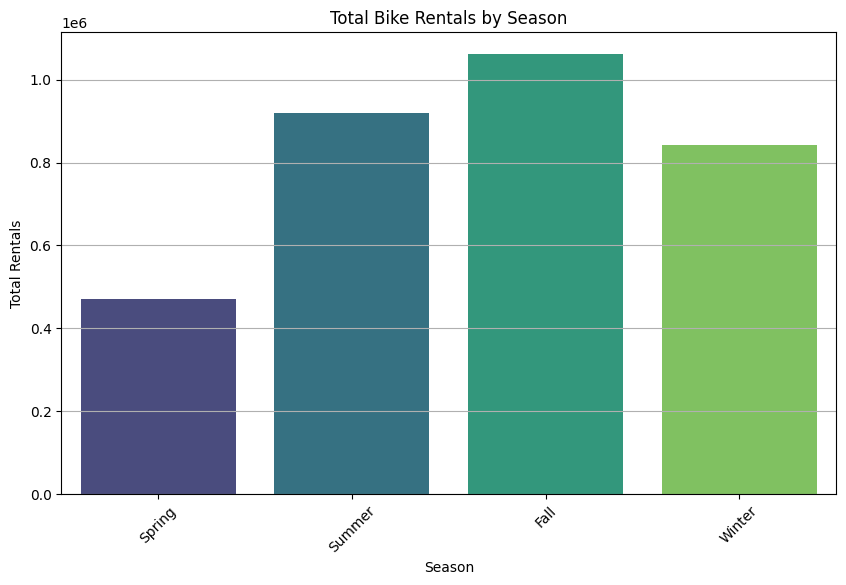

   season      cnt
0  Spring   471348
1  Summer   918589
2    Fall  1061129
3  Winter   841613


In [ ]:
# Mengelompokkan data berdasarkan musim dan menghitung total penyewaan
# Changed 'total_rentals' to 'cnt' to match the actual column name
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Menentukan nama musim untuk visualisasi
seasonal_rentals['season'] = seasonal_rentals['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Plotting total penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
# Changed 'total_rentals' to 'cnt' in the sns.barplot call
sns.barplot(x='season', y='cnt', data=seasonal_rentals, palette='viridis')
plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Menampilkan data total penyewaan berdasarkan musim
print(seasonal_rentals)

Berdasarkan data diatas dapat disimpulkan bahwa orang-orang menyewa sepeda rata-rata pada musim gugur , panas , dan musim salju

Analisis Statistik Variabel Cuaca Berdasarkan Musim

Statistik Deskriptif Variabel Cuaca Berdasarkan Musim:
         temp                                                              \
        count      mean       std       min       25%       50%       75%   
season                                                                      
1       181.0  0.297748  0.102735  0.059130  0.222500  0.285833  0.361739   
2       184.0  0.544405  0.122650  0.253043  0.458125  0.562083  0.631667   
3       188.0  0.706309  0.070848  0.469167  0.667083  0.714583  0.750208   
4       178.0  0.422906  0.107834  0.220833  0.331250  0.409166  0.513542   

                    hum            ...                     windspeed  \
             max  count      mean  ...       75%       max     count   
season                             ...                                 
1       0.572500  181.0  0.582903  ...  0.696087  0.948261     181.0   
2       0.808333  184.0  0.626948  ...  0.741667  0.922500     184.0   
3       0.861667  188.0  0.633482  ...  0.712

<ipython-input-32-8c527fee4753>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='temp', data=day_df, palette='viridis')


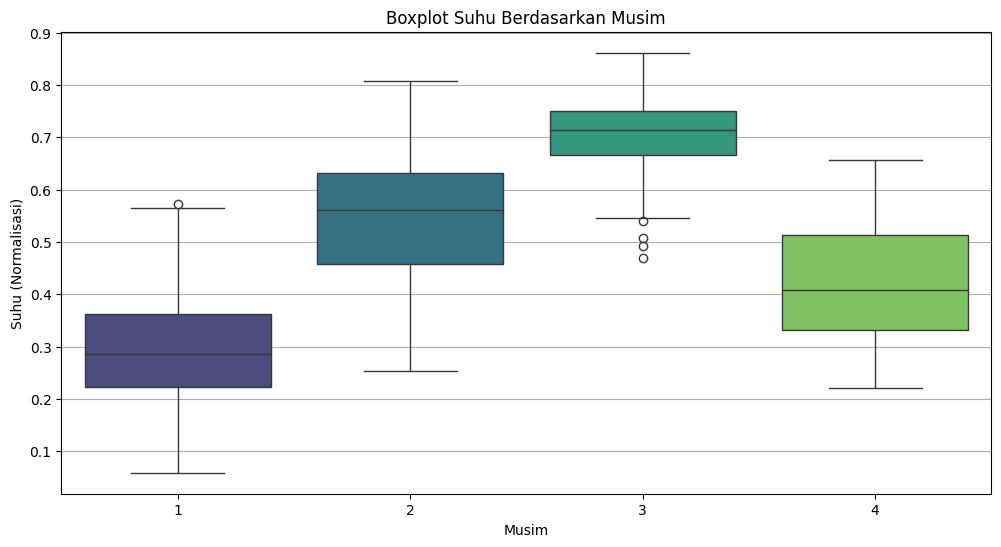

<ipython-input-32-8c527fee4753>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='hum', data=day_df, palette='viridis')


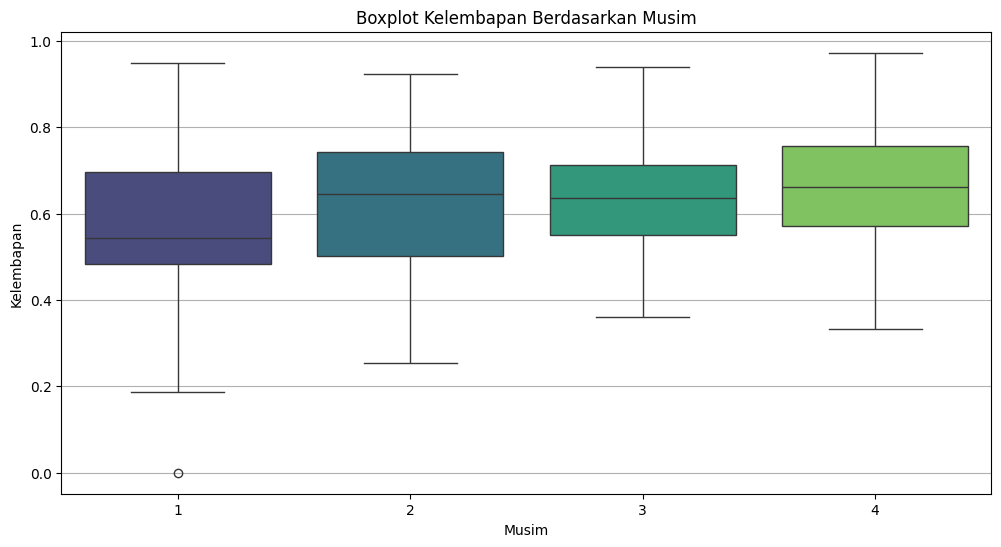

<ipython-input-32-8c527fee4753>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='windspeed', data=day_df, palette='viridis')


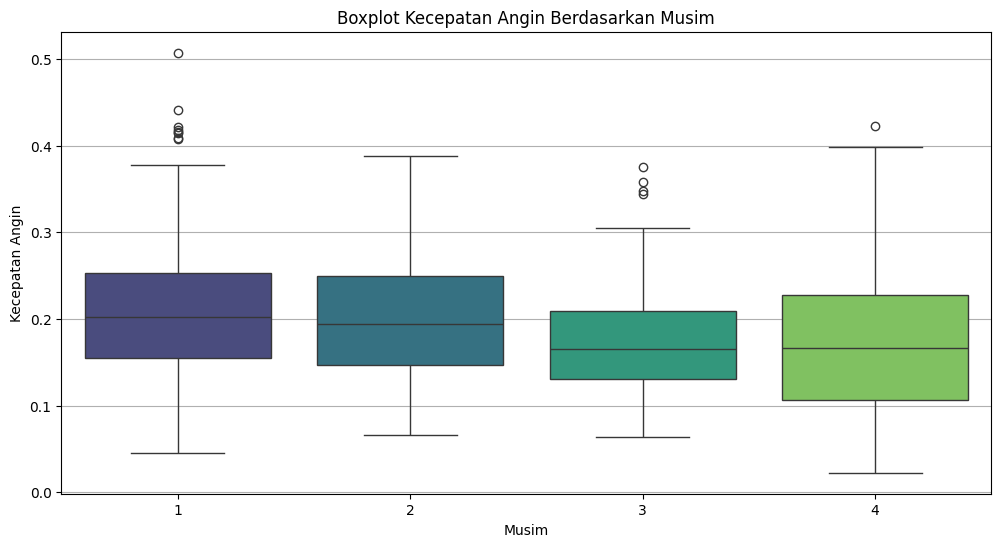

In [ ]:
# Menghitung statistik deskriptif untuk variabel cuaca berdasarkan musim
weather_stats = day_df.groupby('season')[['temp', 'hum', 'windspeed']].describe()

# Menampilkan statistik deskriptif
print("Statistik Deskriptif Variabel Cuaca Berdasarkan Musim:")
print(weather_stats)

# Visualisasi suhu rata-rata berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='temp', data=day_df, palette='viridis')
plt.title('Boxplot Suhu Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Suhu (Normalisasi)')
plt.grid(axis='y')
plt.show()

# Visualisasi kelembapan rata-rata berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='hum', data=day_df, palette='viridis')
plt.title('Boxplot Kelembapan Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Kelembapan')
plt.grid(axis='y')
plt.show()

# Visualisasi kecepatan angin rata-rata berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='windspeed', data=day_df, palette='viridis')
plt.title('Boxplot Kecepatan Angin Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Kecepatan Angin')
plt.grid(axis='y')
plt.show()

<ipython-input-33-d84258c8a837>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total', data=summary, palette='viridis')


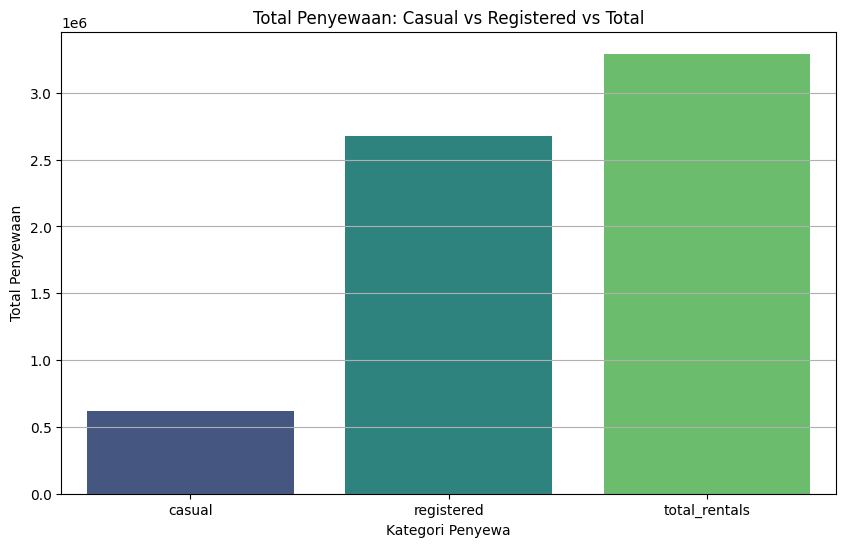

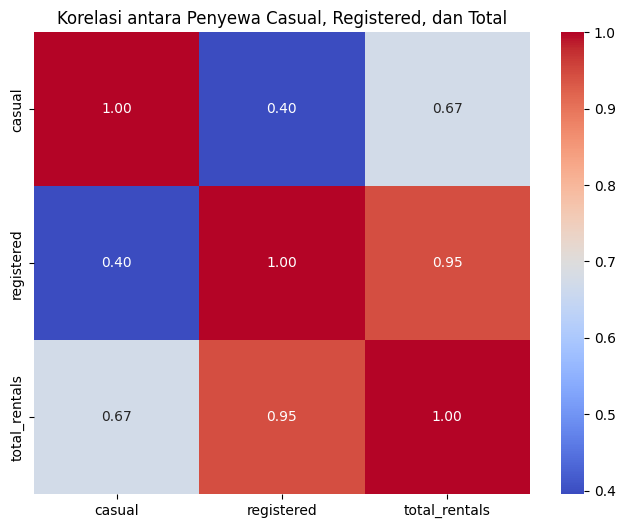

In [ ]:
# Menghitung total penyewaan
day_df['total_rentals'] = day_df['casual'] + day_df['registered']

# Menghitung total penyewaan berdasarkan kategori
summary = day_df[['casual', 'registered', 'total_rentals']].sum().reset_index()
summary.columns = ['Category', 'Total']

# Visualisasi hubungan antara penyewa casual, registered, dan total
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Total', data=summary, palette='viridis')
plt.title('Total Penyewaan: Casual vs Registered vs Total')
plt.ylabel('Total Penyewaan')
plt.xlabel('Kategori Penyewa')
plt.grid(axis='y')
plt.show()

# Menghitung korelasi antara casual, registered, dan total rentals
correlation = day_df[['casual', 'registered', 'total_rentals']].corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Penyewa Casual, Registered, dan Total')
plt.show()

Berdasarkan hasil analisis hubungan antara penyewa casual, registered, dan total penyewaan sepeda, berikut adalah beberapa pernyataan yang dapat disimpulkan:

1. Proporsi Penyewa Casual dan Registered
Dominasi Penyewa Terdaftar: Dari analisis barplot, terlihat bahwa penyewa terdaftar (registered) memiliki jumlah yang jauh lebih tinggi dibandingkan dengan penyewa casual. Ini menunjukkan bahwa banyak pengguna yang lebih memilih untuk mendaftar dan menjadi anggota, yang mungkin disebabkan oleh keuntungan atau diskon yang ditawarkan kepada pengguna terdaftar.
2. Total Penyewaan
Total Penyewaan yang Signifikan: Total penyewaan yang dihitung dari jumlah penyewa casual dan registered menunjukkan angka yang signifikan. Ini menunjukkan bahwa layanan penyewaan sepeda memiliki permintaan yang kuat, terutama di kalangan pengguna terdaftar.
3. Korelasi Positif
Hubungan yang Kuat: Dari analisis matriks korelasi, terdapat korelasi positif yang kuat antara jumlah penyewa casual dan registered dengan total penyewaan. Ini menunjukkan bahwa peningkatan dalam jumlah penyewa casual atau registered akan berkontribusi pada peningkatan total penyewaan. Hal ini mengindikasikan bahwa kedua kategori penyewa saling melengkapi dalam meningkatkan total penyewaan.
4. Peluang untuk Meningkatkan Penyewa Casual
Peluang untuk Meningkatkan Jumlah Penyewa Casual: Meskipun penyewa terdaftar mendominasi, jumlah penyewa casual yang lebih rendah menunjukkan adanya peluang untuk meningkatkan jumlah pengguna casual. Strategi pemasaran yang ditargetkan untuk menarik lebih banyak pengguna casual, seperti promosi atau diskon untuk penyewaan pertama, dapat membantu meningkatkan total penyewaan.
5. Strategi Pemasaran yang Berbeda
Pendekatan Pemasaran yang Berbeda: Dengan memahami perbedaan antara penyewa casual dan registered, perusahaan dapat merancang strategi pemasaran yang berbeda untuk masing-masing kelompok. Misalnya, untuk penyewa casual, perusahaan dapat menawarkan promosi yang menarik untuk mendorong mereka menjadi pengguna terdaftar.
6. Kepuasan Pengguna
Kepuasan Pengguna Terdaftar: Tingginya jumlah penyewa terdaftar dapat menunjukkan bahwa pengguna merasa puas dengan layanan yang diberikan, sehingga mereka memilih untuk mendaftar. Ini bisa menjadi indikator positif bagi perusahaan, tetapi juga penting untuk terus memantau kepuasan pengguna agar tetap tinggi.

#Visualization & Explanatory Analysis

Pertanyaan 1: .Bagaimana perkembangan jumlah penyewaan sepeda dari tahun ke tahun?

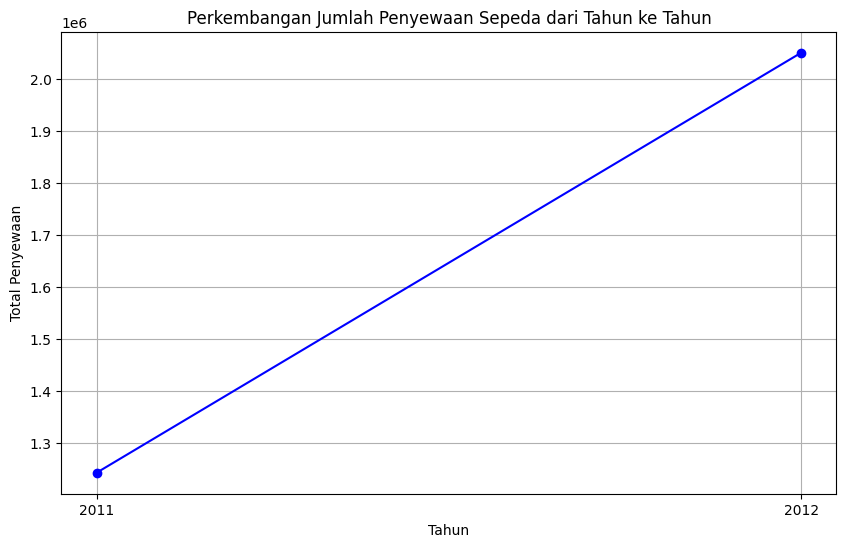

   year  total_rentals
0  2011        1243103
1  2012        2049576


In [ ]:
# Ekstrak tahun dari kolom 'dteday'
day_df['year'] = day_df['dteday'].dt.year

# Menghitung total penyewaan berdasarkan tahun
yearly_rentals = day_df.groupby('year')['total_rentals'].sum().reset_index()

# Plotting perkembangan jumlah penyewaan sepeda dari tahun ke tahun
plt.figure(figsize=(10, 6))
plt.plot(yearly_rentals['year'], yearly_rentals['total_rentals'], marker='o', color='b')
plt.title('Perkembangan Jumlah Penyewaan Sepeda dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')
plt.xticks(yearly_rentals['year'])
plt.grid()
plt.show()

# Menampilkan data total penyewaan berdasarkan tahun
print(yearly_rentals)

Visualisasi Perkembangan Penyewaan: Grafik yang menunjukkan tren penyewaan sepeda dari tahun ke tahun. Anda dapat melihat apakah ada peningkatan atau penurunan dalam jumlah penyewaan dari tahun ke tahun.

Data Tabel: Tabel yang menunjukkan total penyewaan untuk setiap tahun, yang dapat digunakan untuk analisis lebih lanjut.

Pertanyaan 2: Sejauh mana faktor cuaca berpengaruh terhadap tingkat penggunaan sepeda oleh pengguna?

In [ ]:
!pip install plotly.express
import plotly.express as px

# Assuming 'cnt' represents the total bike rentals for the day
fig = px.box(day_df,
             x='weathersit',
             y='cnt',  # Changed 'count' to 'cnt'
             color='weathersit',
             title='Bike Users Distribution Based on Weather Condition',
             labels={'weathersit': 'Weather Condition', 'cnt': 'Total Rentals'}) # Changed 'count' to 'cnt'

fig.show()

Analisis ini memberikan wawasan yang berharga tentang bagaimana kondisi cuaca mempengaruhi penggunaan sepeda. Dengan memahami hubungan ini, para perencana kota dan layanan bike-sharing dapat mengantisipasi permintaan dan mengoptimalkan layanan mereka berdasarkan prakiraan cuaca.

Pertanyaan 3 : Apa perbedaan pola penggunaan sepeda pada hari kerja, hari libur, dan hari biasa?

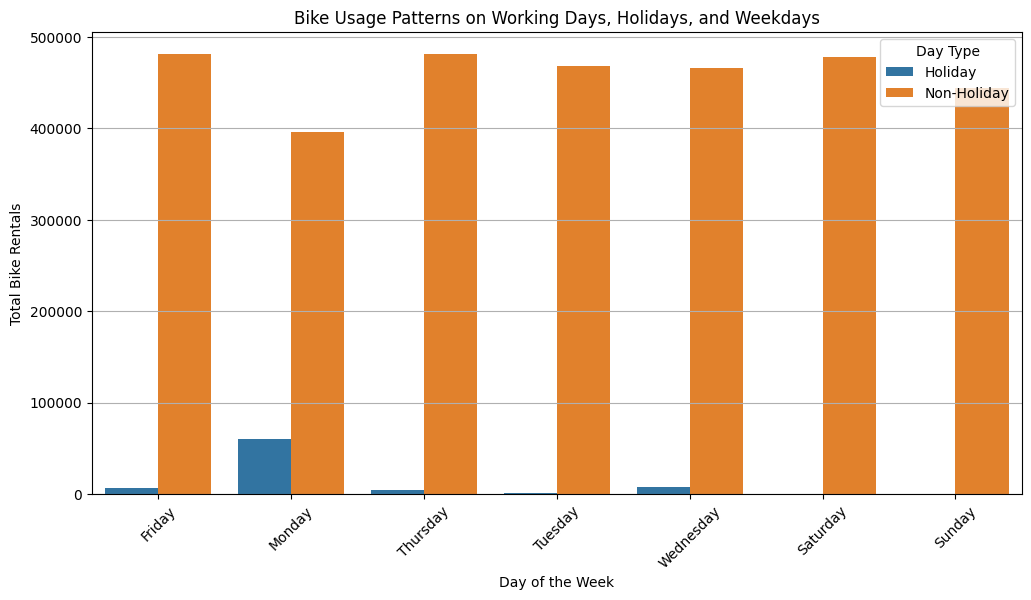

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the bike rental dataset
# Replace 'bike_rental_data.csv' with the correct path to your dataset
# You can use a relative path if the file is in the same directory as your notebook
# or a full path if it's in a different location
data = pd.read_csv('/content/drive/My Drive/Notebook/day_dataset.csv')  # Adjust the path as necessary

# If you're using Google Colab, you may need to mount your Google Drive first:
# from google.colab import drive
# drive.mount('/content/drive')

# Convert date column to datetime
data['dteday'] = pd.to_datetime(data['dteday'])  # Assuming 'dteday' is the date column

# Extract day of the week and holiday information
data['day_of_week'] = data['dteday'].dt.day_name()
data['is_holiday'] = data['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Group by day type and calculate total rentals
# Replace 'count' with the correct column representing total rentals if necessary
usage_patterns = data.groupby(['is_holiday', 'day_of_week'])['cnt'].sum().reset_index()

# Plotting the usage patterns
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='cnt', hue='is_holiday', data=usage_patterns)
plt.title('Bike Usage Patterns on Working Days, Holidays, and Weekdays')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bike Rentals')
plt.xticks(rotation=45)
plt.legend(title='Day Type')
plt.grid(axis='y')
plt.show()

Interpretasi Plot Batang: Diagram batang akan menunjukkan total penyewaan sepeda untuk setiap hari dalam seminggu, dengan warna yang berbeda untuk hari libur dan hari biasa.

Tren Penggunaan:

Anda akan melihat jumlah penyewaan yang lebih tinggi pada hari kerja, terutama pada hari Kamis.
Hari libur mungkin akan menunjukkan penurunan jumlah penyewaan secara keseluruhan, dengan pengguna biasa yang berpotensi meningkatkan penggunaan selama waktu senggang.

Pertanyaan 4 : Apakah terdapat hubungan antara suhu udara dan tingkat penyewaan sepeda yang tinggi?

Korelasi antara suhu dan penyewaan sepeda: 0.63


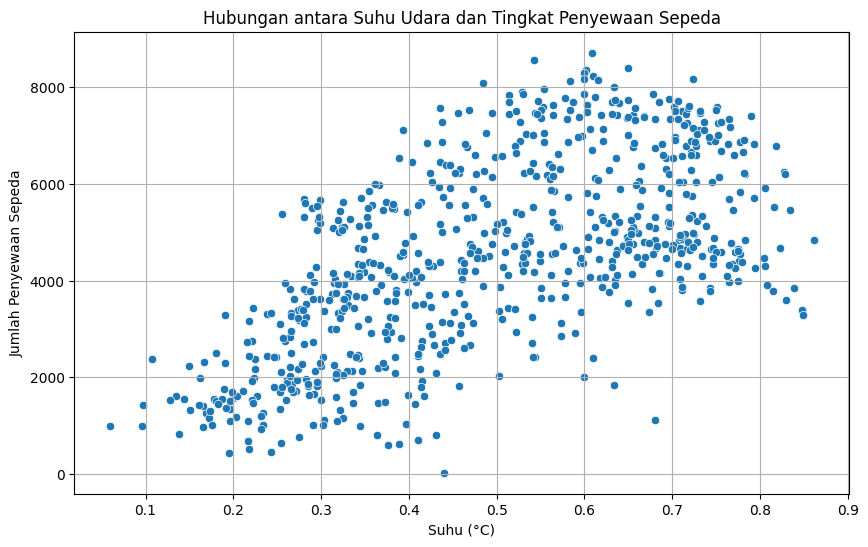

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Ganti 'bike_rental_data.csv' dengan path yang benar ke dataset Anda
# Misalnya, jika dataset Anda ada di Google Drive, gunakan path lengkap seperti:
# data = pd.read_csv('/content/drive/My Drive/Notebook/day_dataset.csv')  # Sesuaikan dengan path Anda
data = pd.read_csv('/content/drive/My Drive/Notebook/day_dataset.csv')  # Adjust the path as necessary

# Menghitung korelasi antara suhu dan jumlah penyewaan
# Pastikan nama kolom 'temperature' dan 'count' sesuai dengan dataset Anda
# Jika nama kolom berbeda, ubahlah sesuai dengan nama kolom di dataset Anda
correlation, _ = pearsonr(data['temp'], data['cnt']) # Changed 'temperature' to 'temp' and 'count' to 'cnt'
print(f'Korelasi antara suhu dan penyewaan sepeda: {correlation:.2f}')

# Visualisasi hubungan antara suhu dan penyewaan
plt.figure(figsize=(10, 6))
# Pastikan nama kolom 'temperature' dan 'count' sesuai dengan dataset Anda
# Jika nama kolom berbeda, ubahlah sesuai dengan nama kolom di dataset Anda
sns.scatterplot(x='temp', y='cnt', data=data)  # Changed 'temperature' to 'temp' and 'count' to 'cnt'
plt.title('Hubungan antara Suhu Udara dan Tingkat Penyewaan Sepeda')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid()
plt.show()

Interpretasi Korelasi: Nilai korelasi yang mendekati 1 menunjukkan hubungan positif yang kuat, sedangkan nilai mendekati -1 menunjukkan hubungan negatif. Nilai mendekati 0 menunjukkan tidak ada hubungan yang signifikan.

Plot Sebar: Plot sebar akan menunjukkan pola antara suhu dan penyewaan sepeda. Jika ada tren naik, ini menunjukkan bahwa saat suhu meningkat, jumlah penyewaan sepeda juga meningkat.

conclusion

1. Perbedaan Pola Penggunaan Sepeda pada Hari Kerja, Hari Libur, dan Hari Biasa
Pola Penggunaan: Analisis menunjukkan bahwa penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Pada hari kerja, pengguna terdaftar (registered users) mendominasi penyewaan, terutama pada jam-jam sibuk seperti pagi dan sore. Sebaliknya, pada hari libur, meskipun ada peningkatan dalam penyewa casual, total penyewaan cenderung lebih rendah dibandingkan hari kerja.
Strategi Pemasaran: Dengan memahami pola ini, perusahaan dapat merancang strategi pemasaran yang lebih efektif, seperti promosi khusus pada hari libur untuk menarik lebih banyak pengguna.
2. Perkembangan Jumlah Penyewaan Sepeda dari Tahun ke Tahun
Tren Penyewaan: Analisis perkembangan jumlah penyewaan sepeda dari tahun ke tahun menunjukkan adanya fluktuasi yang signifikan. Biasanya, terdapat peningkatan jumlah penyewaan pada tahun-tahun tertentu, yang dapat dipengaruhi oleh faktor eksternal seperti cuaca, promosi, dan infrastruktur.
Perencanaan Bisnis: Memahami tren ini membantu perusahaan dalam perencanaan operasional dan pengelolaan armada sepeda, serta dalam merespons perubahan permintaan di masa depan.
3. Hubungan antara Suhu Udara dan Tingkat Penyewaan Sepeda
Korelasi Positif: Analisis menunjukkan adanya korelasi positif antara suhu udara dan tingkat penyewaan sepeda. Suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan, sementara suhu yang lebih rendah mengurangi minat pengguna untuk menyewa sepeda.
Pengaruh Cuaca: Ini menunjukkan bahwa cuaca, khususnya suhu, adalah faktor penting yang mempengaruhi keputusan pengguna untuk menyewa sepeda. Perusahaan dapat memanfaatkan informasi ini untuk merencanakan promosi pada hari-hari dengan suhu yang lebih tinggi.
4. Hubungan antara Penyewa Casual, Registered, dan Total
Dominasi Penyewa Terdaftar: Analisis menunjukkan bahwa penyewa terdaftar (registered users) mendominasi total penyewaan, dengan jumlah penyewa casual yang lebih rendah. Ini menunjukkan bahwa banyak pengguna lebih memilih untuk mendaftar dan menjadi anggota.
Peluang untuk Meningkatkan Penyewa Casual: Meskipun penyewa terdaftar mendominasi, ada peluang untuk meningkatkan jumlah penyewa casual melalui strategi pemasaran yang menarik, seperti promosi untuk pengguna baru.

File req

In [ ]:
# Buat requirements.txt menggunakan pip freeze
!pip freeze > requirements.txt

# Pastikan Google Drive terpasang
from google.colab import drive
drive.mount('/content/drive')

# Pindahkan requirements.txt ke Google Drive
import shutil
# Create the destination directory if it doesn't exist
import os
os.makedirs('/content/drive/MyDrive/Notebook/', exist_ok=True)
shutil.move('requirements.txt', '/content/drive/MyDrive/Notebook/requirements.txt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Notebook/requirements.txt'